In [205]:
# *Name: Omeed Zarrabian*
# *Project 1*

#imports
import pandas as pd
import requests as rq
from bs4 import BeautifulSoup as bs
import numpy as np

In [206]:
# Scraping Data, step 1
r = rq.get('https://cmsc320.github.io/files/top-50-solar-flares.html')
table = bs(r.content, "lxml")
df = pd.read_html(table.find("table").prettify())[0]
df.columns = ["rank", "x_classification", "date", "region", "start_time", "maximum_time", "end_time", "movie"]
df.index = range(1,51)
df.head()

,rank,x_classification,date,region,start_time,maximum_time,end_time,movie
1,1,X28+,2003/11/04,486,19:29,19:53,20:06,Movie View archive
2,2,X20+,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
3,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,Movie View archive
4,4,X17+,2005/09/07,808,17:17,17:40,18:03,Movie View archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive


In [207]:
# Step 2 
df = df.iloc[: , :-1]
df.head()

,rank,x_classification,date,region,start_time,maximum_time,end_time
1,1,X28+,2003/11/04,486,19:29,19:53,20:06
2,2,X20+,2001/04/02,9393,21:32,21:51,22:03
3,3,X17.2+,2003/10/28,486,09:51,11:10,11:24
4,4,X17+,2005/09/07,808,17:17,17:40,18:03
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55


In [208]:
#Step 2 cont.
df["start_datetime"] = df['date'] +" "+ df["start_time"]
df["max_datetime"] = df['date'] +" "+ df["maximum_time"]
df['end_time'] = df['end_time'].str.replace('24:00','23:59')
df["end_datetime"] = df['date'] +" "+ df["end_time"]
df.drop('start_time', axis=1, inplace=True)
df.drop('maximum_time', axis=1, inplace=True)
df.drop('end_time', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)
df = df[['rank', 'x_classification', 'start_datetime', 'max_datetime', 'end_datetime', 'region']]
df.head()

,rank,x_classification,start_datetime,max_datetime,end_datetime,region
1,1,X28+,2003/11/04 19:29,2003/11/04 19:53,2003/11/04 20:06,486
2,2,X20+,2001/04/02 21:32,2001/04/02 21:51,2001/04/02 22:03,9393
3,3,X17.2+,2003/10/28 09:51,2003/10/28 11:10,2003/10/28 11:24,486
4,4,X17+,2005/09/07 17:17,2005/09/07 17:40,2005/09/07 18:03,808
5,5,X14.4,2001/04/15 13:19,2001/04/15 13:50,2001/04/15 13:55,9415


In [209]:
# Converting to DateTime
df['start_datetime'] = pd.to_datetime(df['start_datetime'])
df['max_datetime'] = pd.to_datetime(df['max_datetime'])
df['end_datetime'] = pd.to_datetime(df['end_datetime'])
df.head()

df = df.replace(to_replace="-", value = "blank")
df.head()

,rank,x_classification,start_datetime,max_datetime,end_datetime,region
1,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
2,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
4,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415


In [210]:
# Step 3
r1 = rq.get('https://cmsc320.github.io/files/waves_type2.html')
table = bs(r1.content, 'lxml')
sort = table.find('pre')
content = sort.get_text()


#spltting content into an array by a newline character
arr = content.split('\n')

#deleting unecessary lines
del arr[:12]
del arr[-2:]

#intializing dataframe
df1 = pd.DataFrame(columns=['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region','flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed'], index = range(0,len(arr)))

#loop to fill the dataframe with the array of information
row_index = 0
for el in arr:
    col = el.split(' ')

    while '' in col:
        col.remove('')
    
    col_index = 0
    
    while col_index < 14:
        df1.iat[row_index, col_index] = col[col_index]
        col_index += 1
    
    row_index += 1
    
df1.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712


In [211]:
#Step 4

#Replacing missing entries as NaN

df1['start_frequency'] = df1['start_frequency'].str.replace('\?\?\?\?','NaN')
df1['end_frequency'] = df1['end_frequency'].str.replace('\?\?\?\?','NaN')
df1['flare_location'] = df1['flare_location'].str.replace('------','NaN')
df1['flare_region'] = df1['flare_region'].str.replace('-----','NaN')
df1['flare_classification'] = df1['flare_classification'].str.replace('----','NaN')
df1['cme_date'] = df1['cme_date'].str.replace('--/--','NaN')
df1['cme_time'] = df1['cme_time'].str.replace('--:--','NaN')
df1['cme_angle'] = df1['cme_angle'].str.replace('----','NaN')
df1['cme_width'] = df1['cme_width'].str.replace('----','NaN')
df1['cme_width'] = df1['cme_width'].str.replace('---','NaN')
df1['cme_speed'] = df1['cme_speed'].str.replace('----','NaN')

#creating new column
df1['halo_flare'] = np.where(df1['cme_angle']=='Halo', 'Yes', 'No')

#Replacing 'Halo' entries as 'NA'
df1['cme_angle'] = df1['cme_angle'].str.replace('Halo','NA')

#creating column that signifies a lower bound or not
df1['lower_bound'] = df1.apply(lambda x: ">" in x.cme_width, axis=1)

#stripping '>' symbol from cme_width column
df1['cme_width'] = df1['cme_width'].map(lambda x: x.lstrip('>'))
        
#converting and combining columns to create start_datetime
df1["start_datetime"] = df1['start_date'] +" "+ df1['start_time']
df1['start_datetime'] = pd.to_datetime(df1['start_datetime'])

#extract year from date and combine it to create end_datetime
df1['year'] = pd.DatetimeIndex(df1['start_date']).year
df1['year'] = df1['year'].astype(str)
df1['end_time'] = df1['end_time'].str.replace('24:00','23:59')
df1["end_datetime"] = df1['year'] + "/" + df1['end_date'] + " " + df1['end_time']
df1['end_datetime'] = pd.to_datetime(df1['end_datetime'])

#converting and combining columns to create cme_datetime FIX

#remove original date columns
df1.drop('start_date', axis=1, inplace=True)
df1.drop('start_time', axis=1, inplace=True)
df1.drop('end_date', axis=1, inplace=True)
df1.drop('end_time', axis=1, inplace=True)
#df1.drop('year', axis=1, inplace=True)



#re-ordering columns /// drop year later
df1 = df1[['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency' , 'flare_location'  ,'flare_region' ,'flare_classification' ,'cme_date' ,'cme_time' ,'cme_angle'  ,'cme_width'  ,'cme_speed'  ,'halo_flare' ,'lower_bound']]




df1

C:\Users\ozarr\AppData\Local\Temp\ipykernel_29712\736030703.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['start_frequency'] = df1['start_frequency'].str.replace('\?\?\?\?','NaN')
C:\Users\ozarr\AppData\Local\Temp\ipykernel_29712\736030703.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['end_frequency'] = df1['end_frequency'].str.replace('\?\?\?\?','NaN')


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,halo_flare,lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,No,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,360,878,Yes,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,360,464,Yes,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,No,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,09/04,20:12,NA,360,1418,Yes,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,09/06,12:24,NA,360,1571,Yes,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,09/10,16:00,NA,360,3163,Yes,False
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252,No,False


In [212]:
#Part 2: Analysis
#Question 1

#stripping letter and number of classification to order it
df1['flare_classification'] = df1['flare_classification'].map(lambda x: x.rstrip('.'))
df1['classification_letter'] = df1['flare_classification'].astype(str).str[0]
df1['classification_num'] = np.where(df1['flare_classification']!= 'NaN', df1['flare_classification'].astype(str).str[1:], '0')
df1['classification_num'] = df1['classification_num'].replace(['ILA'],'0')
df1['classification_num'] = pd.to_numeric(df1['classification_num'])

#sorting by classification
df1 = df1.sort_values(['classification_letter', 'classification_num'], ascending=[False, False])

#re-order columns
df1 = df1[['classification_letter', 'classification_num', 'flare_classification', 'start_datetime', 'end_datetime', 'start_frequency', 'end_frequency' , 'flare_location'  ,'flare_region','cme_date' ,'cme_time' ,'cme_angle'  ,'cme_width'  ,'cme_speed'  ,'halo_flare' ,'lower_bound']]


#creating a new column to signifiy if they are in the top 50
df1['InTop50'] = np.where(df1['classification_letter'].str.contains('X').any() and df1['classification_num'] >= 1.9, 'Y', 'N')

top50 = df1.head(50)

top50



,classification_letter,classification_num,flare_classification,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,cme_date,cme_time,cme_angle,cme_width,cme_speed,halo_flare,lower_bound,InTop50
240,X,28.0,X28,2003-11-04 20:00:00,2003-11-04 23:59:00,10000,200,S19W83,10486,11/04,19:54,NA,360,2657,Yes,False,Y
117,X,20.0,X20,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,04/02,22:06,261,244,2505,No,False,Y
233,X,17.0,X17,2003-10-28 11:10:00,2003-10-29 23:59:00,14000,40,S16E08,10486,10/28,11:30,NA,360,2459,Yes,False,Y
126,X,14.0,X14,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,04/15,14:06,245,167,1199,No,False,Y
234,X,10.0,X10,2003-10-29 20:55:00,2003-10-29 23:59:00,11000,500,S15W02,10486,10/29,20:54,NA,360,2029,Yes,False,Y
8,X,9.4,X9.4,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,11/06,12:10,NA,360,1556,Yes,False,Y
514,X,9.3,X9.3,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,09/06,12:24,NA,360,1571,Yes,False,Y
328,X,9.0,X9.0,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,NaN,NaN,NaN,NaN,NaN,No,False,Y
237,X,8.3,X8.3,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,11/02,17:30,NA,360,2598,Yes,False,Y
515,X,8.3,X8.3,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,09/10,16:00,NA,360,3163,Yes,False,Y


In [213]:
#I did not get the same top 50 for solar flares. I got relatively the same order, but there was some missing data.
    #For example, there is no 'X17.2' classification like there was in the top 50 mirror. I replicated it as best as I could by
    #stripping the letter and number from the classification and sorting them together in descending order.

In [214]:
#Question 2:
# rank = []
# def replication(rowNum):
#     for row in df.iterrows():
#         reg = df1.iat[rowNum, 5]
#         if len(df1.iat[rowNum, 5]) == 5:
#             reg = reg[1:]
#         if (str(df1.iat[rowNum, 0])[:11 == str(row[1]['start_datetime'])[:11] and
#             str(df1.iat[rowNum, 1])[:11 == str(row[1]['end_datetime'])[:11] and
#             reg == row[1]['region'] and df1.iat[rowNum, 6][:2] == row[1]['x_classification'][:2]):
                                    
#             return row[1]['index']
                                    
#     return "none"
    
# for i in range(0, len(df1)):
#     rank.append(replication(i))

# df1['rank'] = pd.Series(rank)
# print(df1)

#code not working no matter what I tried. But my idea was to compare the rows in each dataframe that had the same start date, end date,
#region, and classification (which would make it most likely a match. I check if there is a matching row in the function, and 
#check for duplicates because I don't want rows matching to multiple other rows.

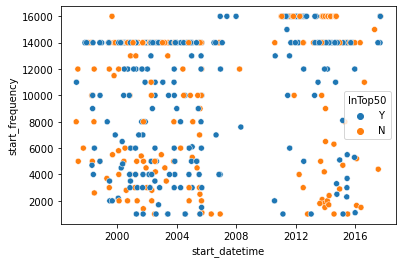

In [215]:
#Question 3, Analysis 1:
# The intent of this plot is to visualize if the flares in the top 50 tend to group in certain areas or not, or to see the difference
# in spread between the flares in/not in the top 50.

df1.drop(df1.loc[df1['start_frequency']== 'NaN'].index, inplace=True)
df1['start_frequency'] = df1['start_frequency'].apply(int)

import seaborn as sns
plot = sns.scatterplot(data=df1, x = 'start_datetime', y = 'start_frequency', hue = 'InTop50')

# the plot is showing where the top 50 flares are based on color. It seems that the clustering of the top 50 has no patterns,
# but you can kind of see that they cluster at low starting frequencies near the year of 2014, and cluster at high starting
# frequencies near the year of 2012.

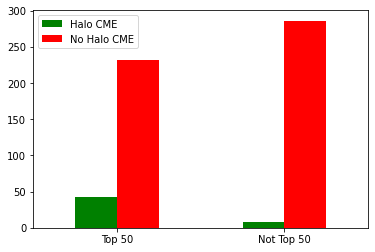

In [216]:
# Extra Analysis
%matplotlib inline

df1['halo_flare'].value_counts(ascending=True)
Nasa_Halo = 286
Nasa_NotHalo = 232
top50['halo_flare'].value_counts(ascending=True)
Top50_Halo = 42
Top50_NotHalo = 8

Halo = [Top50_Halo, Top50_NotHalo]
NoHalo = [Nasa_NotHalo, Nasa_Halo]

index = ['Top 50', 'Not Top 50']
df2 = pd.DataFrame({'Halo CME': Halo,
                    'No Halo CME': NoHalo}, index=index)
ax = df2.plot.bar(rot=0, color={"Halo CME": "green", "No Halo CME": "red"})